<a href="https://colab.research.google.com/github/iMikeJr/Optimizacion-no-lineal/blob/main/B%C3%BAsqueda_lineal_exacta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNCIÓN OBJETIVO**

$f(x) = \frac{1}{2}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
3 & 2 \\
2 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
1 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+ 5$

$f(x) = 1.5x_1^2 + 2x_1x_2 + 3x_2^2 + x_1 - x_2 + 5
$


# **GRADIENTE**
$\nabla f(x) =
\begin{bmatrix}
3 & 2 \\
2 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
1 \\
-1
\end{bmatrix}
$

$\nabla f(x) =
\begin{bmatrix}
3x_1 + 2x_2 + 1 \\
2x_1 + 6x_2 - 1
\end{bmatrix}
$



$\alpha = -\frac{\nabla f(x)^T d}{d^T \nabla^2 f(x) d}
$

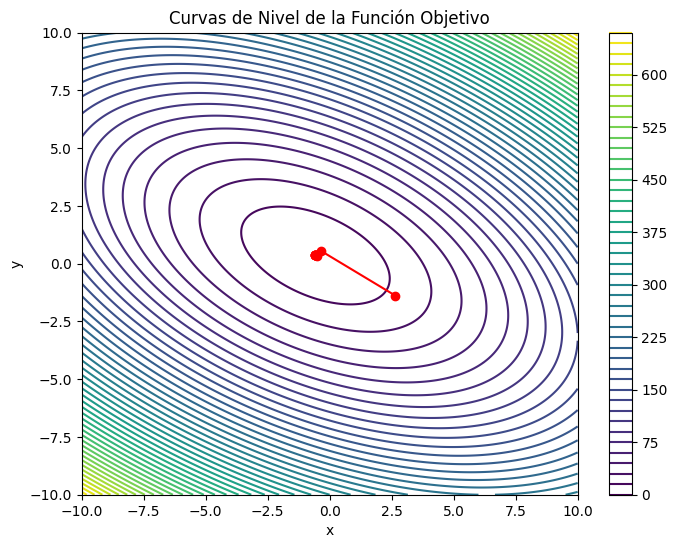

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(X, Y):
    Q = np.array([[3, 2], [2, 6]])
    b = np.array([1, -1])
    c = 5
    Z = 0.5 * (Q[0,0]*X**2 + 2*Q[0,1]*X*Y + Q[1,1]*Y**2) + b[0]*X + b[1]*Y + c
    return Z
def grad_f(x, y):
    Q = np.array([[3, 2], [2, 6]])
    b = np.array([1, -1])
    xy = np.array([x, y])
    return np.dot(Q, xy) + b

# hessiano de la función objetivo
def hessian_f(x, y):
    Q = np.array([[3, 2], [2, 6]])
    return Q

def exact_line_search_multivariable(x0, y0, tol=1e-5, max_iter=100):
    ruta = []
    x, y = x0, y0
    for i in range(max_iter):
        grad = grad_f(x, y)

        #condición de parada
        if np.linalg.norm(grad) < tol:
            break
        H = hessian_f(x, y)

        #tamaño del paso alpha para la búsqueda de línea exacta
        alpha = -np.dot(grad.T, grad) / np.dot(np.dot(grad.T, H), grad)
        xy = np.array([x, y]) + alpha * grad
        x, y = xy[0], xy[1]
        ruta.append((x, y))
    return x, y, ruta

x0, y0 = 10.0, 10.0
optimal_x, optimal_y, ruta = exact_line_search_multivariable(x0, y0)

#puntos para la gráfica de curvas de nivel
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#gráfica de curvas de nivel
plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Curvas de Nivel de la Función Objetivo')
plt.xlabel('x')
plt.ylabel('y')

#"caminito hacia el mínimo"
ruta_x, ruta_y = zip(*ruta)
plt.plot(ruta_x, ruta_y, 'ro-')
plt.scatter(optimal_x, optimal_y, c='red')
plt.show()
